<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [2]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src

/content/MA574_Portfolio-Valuation-and-Risk-Management/src


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
Apple = pd.read_csv('AAPL.csv')
GOOG = pd.read_csv('GOOG.csv')
ETF= pd.read_csv('SPDR_S&P_500_ETF.csv')
Begin_Year2_index = 252

1.Using this daily data, calculate the daily log returns for year-1. Build a histogram of these daily returns.


<Figure size 432x288 with 0 Axes>

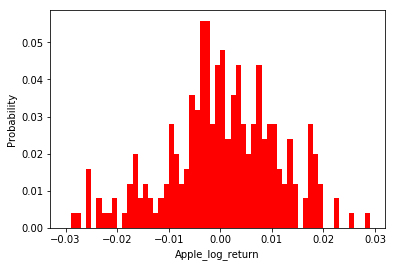

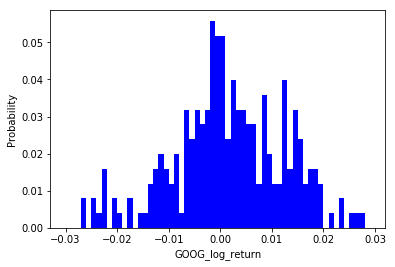

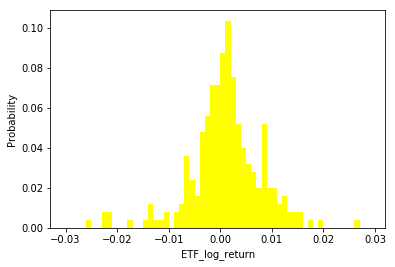

<Figure size 432x288 with 0 Axes>

In [21]:
#Problem 1
Log_return = pd.DataFrame(data = [np.log(Apple['Adj Close'][i]/Apple['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)],columns = ['Apple_log_return'])
Log_return['GOOG_log_return'] = np.array([np.log(GOOG['Adj Close'][i]/GOOG['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)])
Log_return['ETF_log_return'] = np.array([np.log(ETF['Adj Close'][i]/ETF['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)])
bins = [0.001*i for i in range(-30,30)]
plt.hist(Log_return['Apple_log_return'],bins = bins,color = 'red', weights = [1./len(Log_return['Apple_log_return'])]*len(Log_return['Apple_log_return']))
plt.xlabel('Apple_log_return')
plt.ylabel('Probability')
plt.figure()
plt.hist(Log_return['GOOG_log_return'],bins = bins,color = 'blue', weights = [1./len(Log_return['GOOG_log_return'])]*len(Log_return['GOOG_log_return']))
plt.xlabel('GOOG_log_return')
plt.ylabel('Probability')
plt.figure()
plt.hist(Log_return['ETF_log_return'],bins = bins,color = 'yellow', weights = [1./len(Log_return['ETF_log_return'])]*len(Log_return['ETF_log_return']))
plt.xlabel('ETF_log_return')
plt.ylabel('Probability')
plt.figure()